## Imports

In [1]:
from scipy.optimize import brentq
from simulib.cash_flow_models import *
from simulib.visualize import *

## Calc LCOE given net CAPEX (Gov't support - CAPEX)

In [2]:
a = get_discounted_power_production(
        wind_annual_power_production = 69032.25,
        t_construction = 2, LT_field = 26,
        discount_rate = 0.06
    ),
b = net_present_value([0, 9] + 25*[100], 0.06)

print(b/a*1000*1000)

[1458.79701826]


## Simulation Results

In [3]:
W = 100 # number of simulation paths

In [4]:
wc_simulation = MonteCarlo(WindContractorPath, 1)
fo_simulation = MonteCarlo(FieldOperatorPath, W)

WindContractorPath Simulation complete at 0 ms
FieldOperatorPath Simulation complete at 12 ms


In [6]:
years

array([2025, 2026, 2027, 2028, 2029, 2030])

### Gas

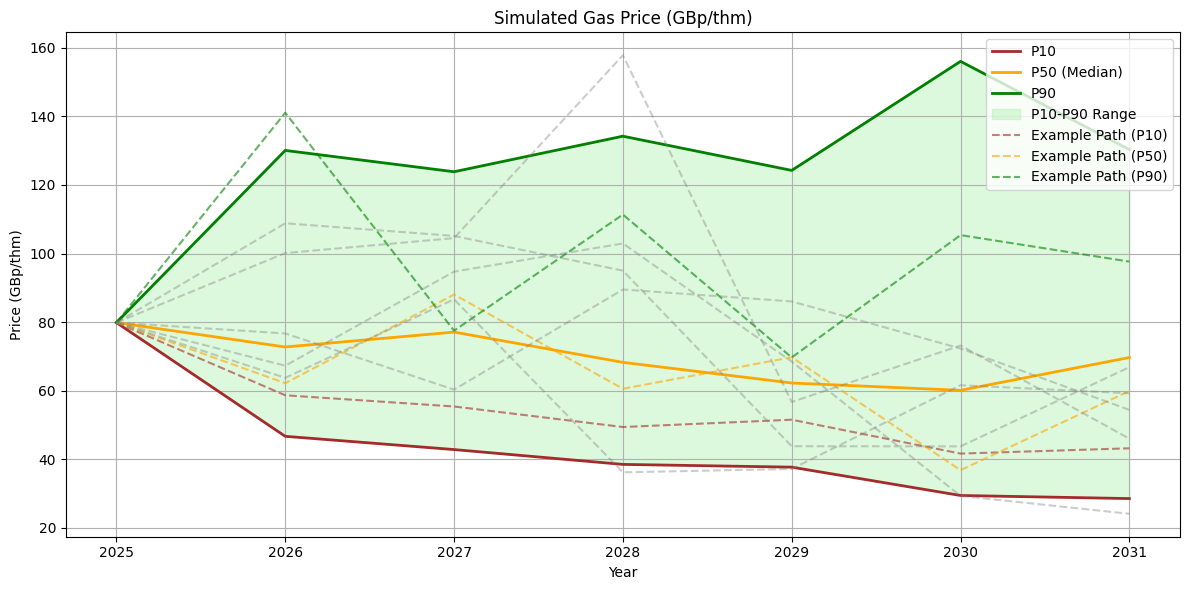

In [8]:
years = np.arange(2025, 2032)
num_paths = W
state_variable_paths = np.array([path.state_variables["P_gas"] for path in fo_simulation.paths])

# Call the function
plot_state_variable_paths(
    years, 
    state_variable_paths, 
    title="Simulated Gas Price (GBp/thm)", 
    ylabel="Price (GBp/thm)"
)


### Carbon

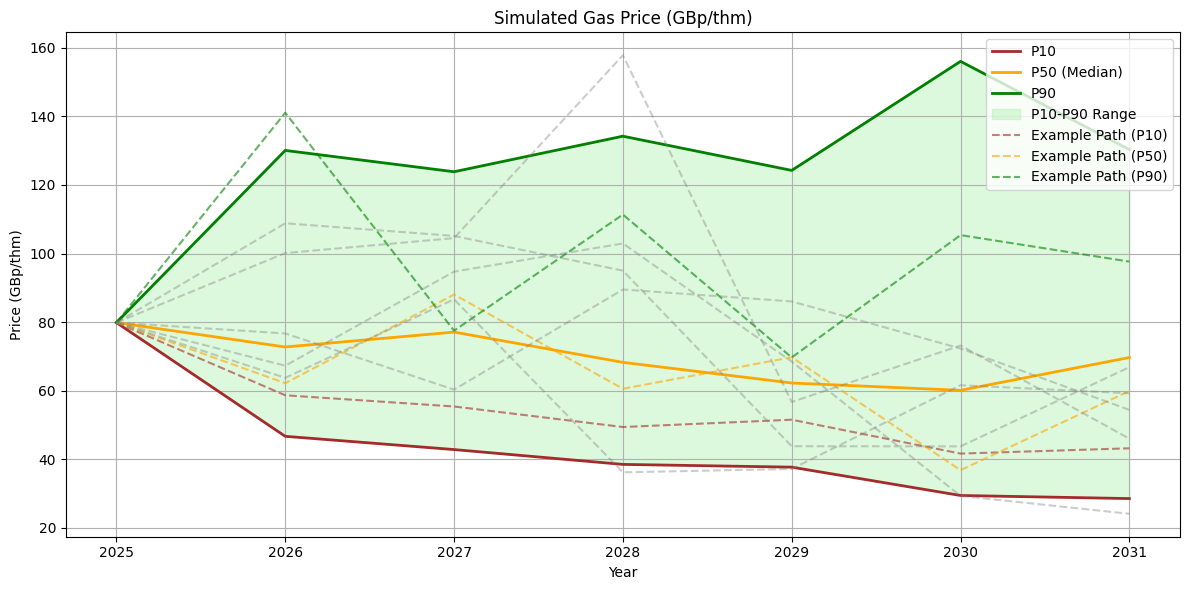

In [ ]:
years = np.arange(2025, 2032)
num_paths = W
state_variable_paths = np.array([path.state_variables["P_gas"] for path in fo_simulation.paths])

# Call the function
plot_state_variable_paths(
    years, 
    state_variable_paths, 
    title="Simulated Gas Price (GBp/thm)", 
    ylabel="Price (GBp/thm)"
)


## Standard Case Results

In [62]:
kwargs["CAPEX_support"] = 2000 * 10**6

In [ ]:
ppa_price = 2000 # kr/MWh basert på utsira Nord "high"-case

In [64]:
npv_wc = wc_simulation.calculate_all_cash_flows(ppa_price = ppa_price, **kwargs)
npv_fo = fo_simulation.calculate_all_cash_flows(ppa_price = ppa_price, **kwargs)
print_currency_array("NPV WC", npv_wc)
print_currency_array("NPV FO", npv_fo)
print("NPV FO", f"{int(np.mean(npv_fo) / 1e6):,}".replace(",", " "))
print("NPV Net:", f"{int((np.mean(npv_wc) + np.mean(npv_fo)) / 1e6):,}".replace(",", " "))

NPV WC ['414']
NPV FO ['411', '404', '783', '1 089', '394', '2 453', '1 027', '428', '308', '505', '613', '394', '377', '876', '437', '625', '656', '543', '594', '548', '519', '557', '634', '555', '346', '714', '570', '707', '539', '533', '239', '676', '891', '554', '965', '655', '423', '615', '613', '435', '686', '687', '444', '920', '627', '358', '622', '446', '531', '345', '537', '638', '411', '684', '439', '339', '530', '486', '487', '781', '414', '410', '371', '636', '457', '281', '409', '326', '363', '421', '577', '903', '465', '343', '513', '395', '464', '666', '601', '399', '707', '611', '598', '586', '692', '538', '544', '852', '511', '462', '446', '320', '384', '516', '629', '600', '982', '418', '410', '526']
NPV FO 570
NPV Net: 984


# Sensitivity Analyses

## CAPEX

In [26]:
CAPEX_low = 000 * 10**6
CAPEX_high = 3000 * 10**6

def objective(CAPEX):
    kwargs_copy = kwargs.copy()
    kwargs_copy["CAPEX"] = CAPEX
    npv = wc_simulation.calculate_all_cash_flows(ppa_price = ppa_price, **kwargs_copy)[0]
    return npv

zero_level = brentq(objective, CAPEX_low, CAPEX_high)
zero_level

428366577.800936

## PPA-price

In [29]:
ppa_low = 0
ppa_high = 10000

def objective(ppa_price):
    kwargs_copy = kwargs.copy()
    # kwargs_copy["CAPEX"] = CAPEX
    npv = wc_simulation.calculate_all_cash_flows(ppa_price = ppa_price, **kwargs_copy)[0]
    return npv

zero_level = brentq(objective, ppa_low, ppa_high)
zero_level

8956.604173608805

In [12]:
net_present_value([0.e+00,  0.e+00, -1.e+08, -1.e+08, -1.e+08, -1.e+08,  1.e+09], 0.07)

349780424.14698666

In [10]:
objective(000)

[ 0.e+00  0.e+00 -1.e+08 -1.e+08 -1.e+08 -1.e+08  1.e+09]


349780424.14698666

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


plt.figure(figsize=(10, 6))
plt.hist(data, bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("title")
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

